In [1]:
# Affordability 
    # Income to cars purchased
# Gender Analysis: 
    # Gender vs. Transmission/Color
    # Gender vs. Body Style and Income
# Car Models, Transmission, and Price Comparison
# Sales Pattern Analysis
    # Temporal Sales Patterns
    # Sales by Car Features
# Regional Sales Analysis
    # Sales by Region
    # Regional Preferences

In [2]:
#import Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
df = pd.read_csv("/Users/kobynaebow/Desktop/Car_Sales_Analysis/Car-Sales-/Car Sales.xlsx - car_data.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [4]:
# Data Cleaning
df.info()

# find duplicate rows
duplicate_rows = df.duplicated().values.any()

#duplicate_rows = df.duplicated().sum()
duplicate_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


False

In [5]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [6]:
# Check for null values in each column
df.isnull().sum()

# Identify rows with null values in a specific column
null_in_column = df['Customer Name'].isnull()
df[null_in_column]

# Handling null values: Filling with a random name 
car_sales_df = df.fillna(value={'Customer Name': 'Emmanuel Michaels'})

car_sales_df.loc[[7564]]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,Emmanuel Michaels,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


### 1. Affordability Analysis

##### Question: How does the affordability of cars, measured by the ratio of a buyer's income to the car's purchase price, vary across different income levels?

##### Objective: To analyze and categorize the affordability of cars based on buyers' income and car purchase prices. Identify trends and patterns in the affordability of cars among different income groups.

In [7]:
df['affordability_ratio'] = car_sales_df['Annual Income'] / car_sales_df['Price ($)']

In [8]:
# Define a function to categorize affordability
def categorize_affordability(ratio):
    if ratio >= 1:
        return 'Affordable'
    elif 0.5 <= ratio < 1:
        return 'Expensive'
    else:
        return 'Luxury'

# Apply the function to create a new column for affordability category
df['affordability_category'] = df['affordability_ratio'].apply(categorize_affordability)

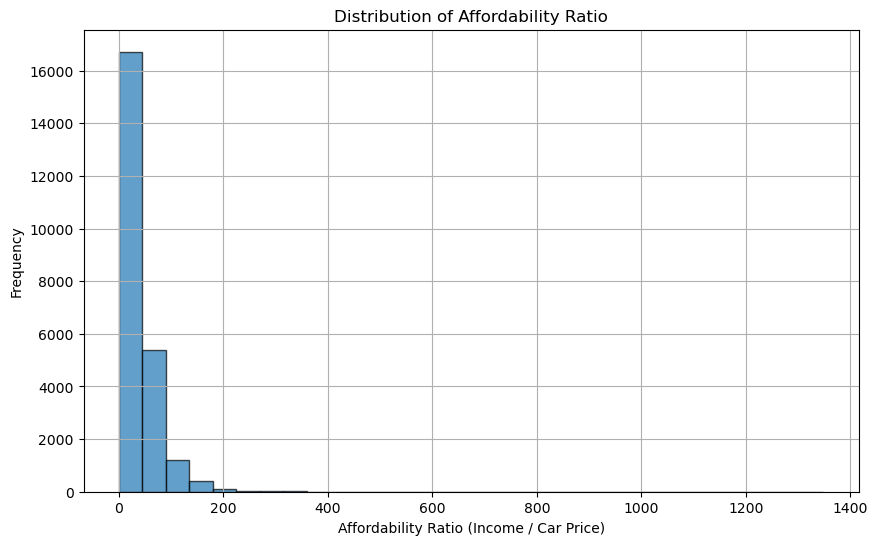

In [9]:
# Plot the distribution of the affordability ratio
plt.figure(figsize=(10, 6))
plt.hist(df['affordability_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Affordability Ratio')
plt.xlabel('Affordability Ratio (Income / Car Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

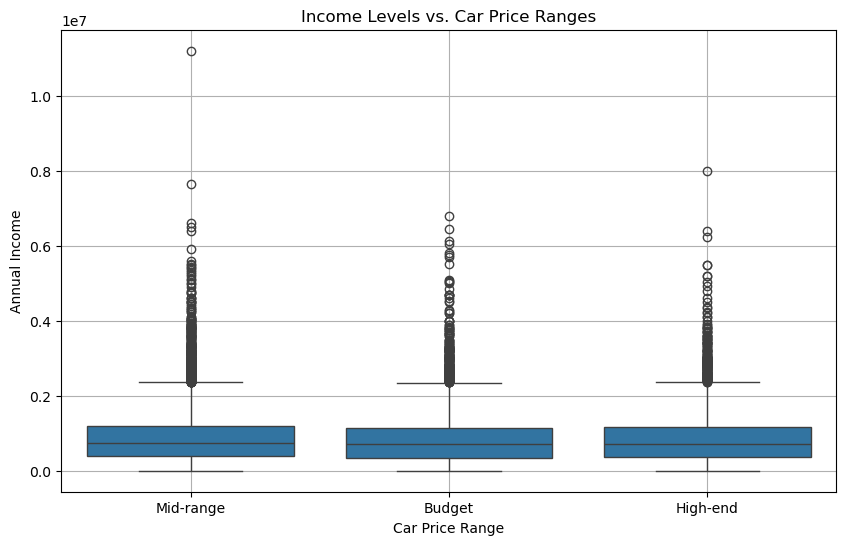

In [10]:
# Create a new column for price range categories. Prices range from $1,200 to $85,800
def categorize_price(price):
    if price < 20000:
        return 'Budget'
    elif 20000 <= price < 40000:
        return 'Mid-range'
    else:
        return 'High-end'

car_sales_df['price_range'] = car_sales_df['Price ($)'].apply(categorize_price)

# Plot the relationship between income levels and car price ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='Annual Income', data=car_sales_df)
plt.title('Income Levels vs. Car Price Ranges')
plt.xlabel('Car Price Range')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

In [11]:
# Calculate the correlation between 'Annual Income' and 'Price ($)'
correlation = car_sales_df['Annual Income'].corr(car_sales_df['Price ($)'])

print(f"The correlation between Annual Income and Price ($) is: {correlation}")

## this result suggests that Annual Income is not a strong predictor of Price ($), at least in a linear sense.

The correlation between Annual Income and Price ($) is: 0.012064959420296463


### 2. Gender and Car Preferences

##### Question 1: How do car preferences, in terms of transmission type and color, differ between genders?

##### Objective: To explore the relationship between gender and car preferences, focusing on the type of transmission (manual vs. automatic) and color choices.

##### Question 2: What is the relationship between gender, car body style preferences, and income levels?

##### Objective: To investigate how gender influences the choice of car body style (e.g., sedan, SUV, hatchback) and how these preferences correlate with the buyer's income.

In [12]:
transmission_by_gender = car_sales_df.groupby(['Gender', 'Transmission']).size().unstack()
transmission_by_gender

Transmission,Auto,Manual
Gender,,
Female,2699,2409
Male,9872,8926


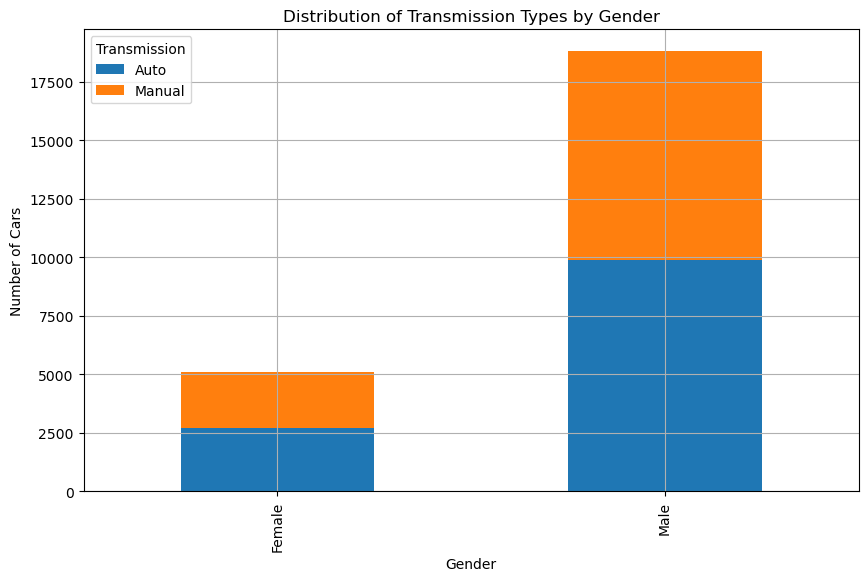

In [13]:
# Plotting the distribution using a bar chart
transmission_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Transmission Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

In [14]:
color_by_gender = car_sales_df.groupby(['Gender', 'Color']).size().unstack()
color_by_gender

Color,Black,Pale White,Red
Gender,,,
Female,1653,2448,1007
Male,6204,8808,3786


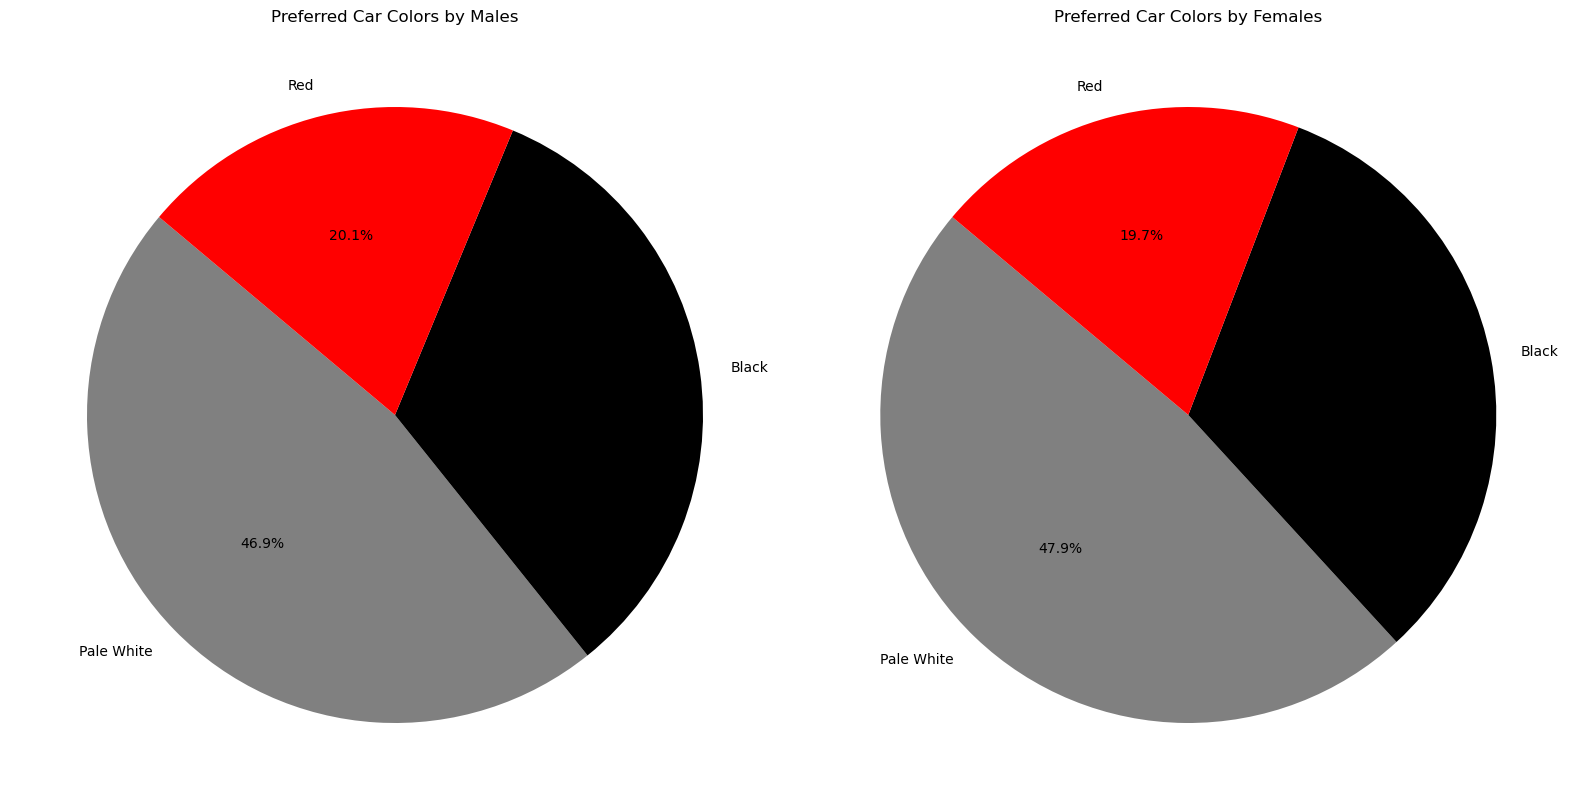

In [15]:
# Aggregate the data for male and female separately
colors_male = car_sales_df[car_sales_df['Gender'] == 'Male']['Color'].value_counts()
colors_female = car_sales_df[car_sales_df['Gender'] == 'Female']['Color'].value_counts()

# Define custom colors (ensuring 'Red' is assigned to 'red')
custom_colors = {
    'Red': 'red',
    'Pale White': 'grey',
    'Black': 'black',
}

# Get color list for males
male_color_list = [custom_colors[color] for color in colors_male.index]

# Get color list for females
female_color_list = [custom_colors[color] for color in colors_female.index]

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the pie chart for males
axs[0].pie(colors_male, labels=colors_male.index, autopct='%1.1f%%', startangle=140, colors=male_color_list)
axs[0].set_title('Preferred Car Colors by Males')

# Plotting the pie chart for females
axs[1].pie(colors_female, labels=colors_female.index, autopct='%1.1f%%', startangle=140, colors=female_color_list)
axs[1].set_title('Preferred Car Colors by Females')

# Adjust layout to ensure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
# Calculate the distribution
body_style_by_gender = car_sales_df.groupby(['Gender', 'Body Style']).size().unstack()
body_style_by_gender

Body Style,Hardtop,Hatchback,Passenger,SUV,Sedan
Gender,,,,,
Female,647,1298,883,1335,945
Male,2324,4830,3062,5039,3543


In [17]:
# Calculate the average income by gender and body style
income_by_gender_body_style = car_sales_df.groupby(['Gender', 'Body Style'])['Annual Income'].mean().unstack()
income_by_gender_body_style

Body Style,Hardtop,Hatchback,Passenger,SUV,Sedan
Gender,,,,,
Female,712513.041731,787714.074730,758329.439411,766994.541573,724358.495238
Male,851629.342513,868228.099586,838242.182234,838302.651717,857161.932261


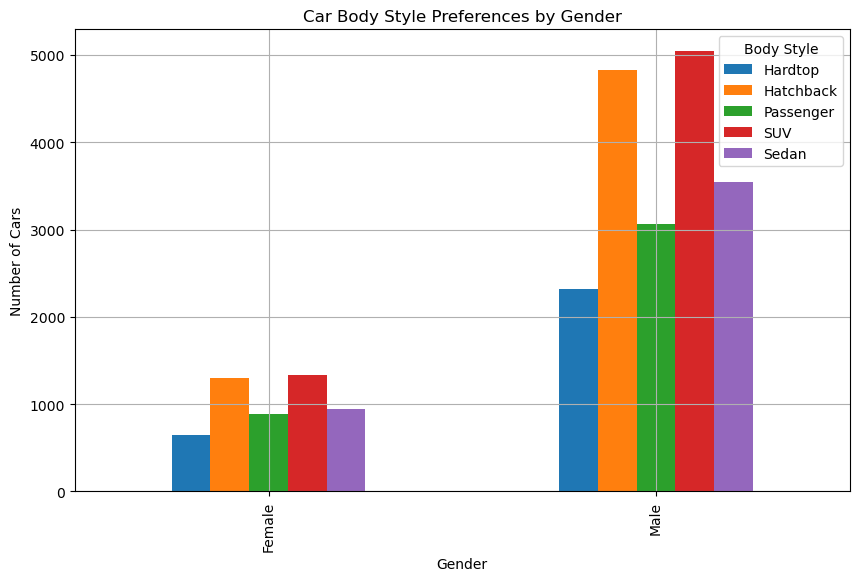

In [18]:
# Plotting the distribution using a grouped bar chart
body_style_by_gender.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Car Body Style Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

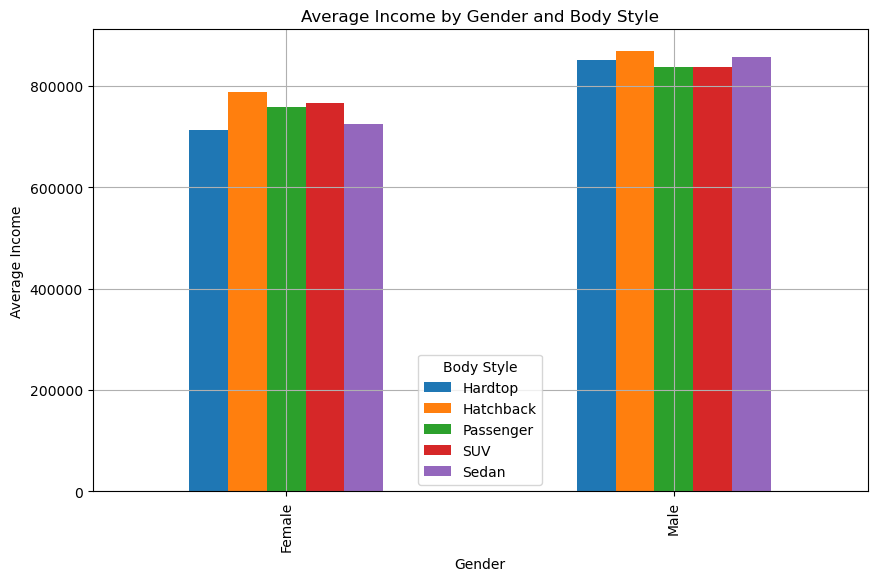

In [19]:
# Plotting the comparison using a grouped bar chart
income_by_gender_body_style.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Average Income by Gender and Body Style')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

### 3. Model, Transmission, and Price Analysis

##### Question: How do different car models compare in terms of transmission types and price ranges?

##### Objective: To compare and analyze the distribution of car models across different transmission types and price ranges. Identify which models are more popular in specific price brackets and with certain transmission types.

In [20]:
# Merging 'Company' and 'Model' into a new column 'Car Model'
car_sales_df['Car Model'] = car_sales_df['Company'] + ' ' + car_sales_df['Model']
car_sales_df


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,price_range,Car Model
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Mid-range,Ford Expedition
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Budget,Dodge Durango
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Mid-range,Cadillac Eldorado
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Budget,Toyota Celica
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Mid-range,Acura TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,Budget,Plymouth Voyager
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Budget,Chevrolet Prizm
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Mid-range,BMW 328i
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,Mid-range,Chevrolet Metro


In [21]:
# Group by car model, transmission, and price range
company_prices = car_sales_df.groupby('Company')['Price ($)'].mean().reset_index()
company_prices

,Company,Price ($)
0,Acura,24758.561684
1,Audi,22851.790598
2,BMW,25090.622785
3,Buick,33634.362187
4,Cadillac,40972.093558
5,Chevrolet,26198.606377
6,Chrysler,26019.529464
7,Dodge,26406.341113
8,Ford,29263.682156
9,Honda,28082.959040


/var/folders/0v/zf9m1rh924j9sm6bmtpt01340000gn/T/ipykernel_5700/1607305974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Company', y='Price ($)', data=company_prices, palette=palette)


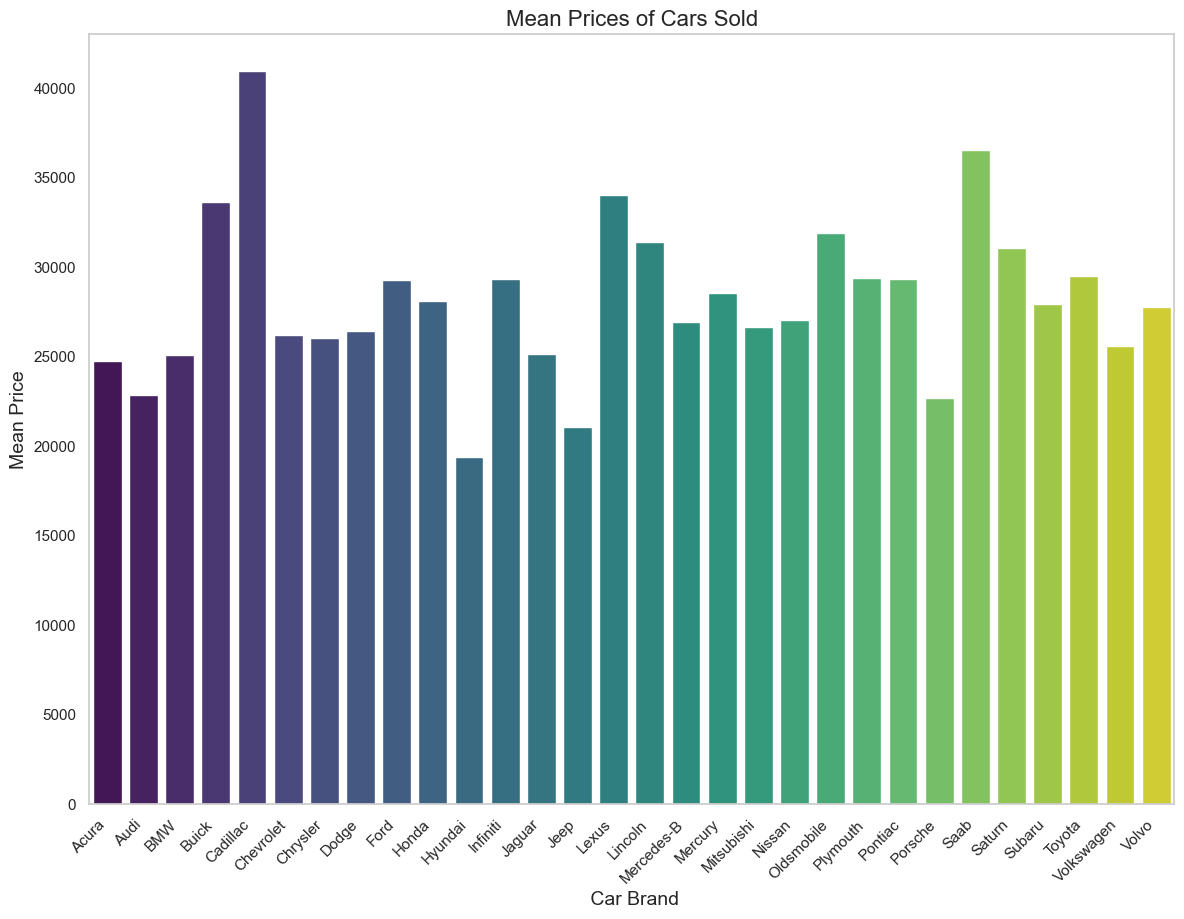

In [22]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(company_prices))
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Company', y='Price ($)', data=company_prices, palette=palette)
plt.xlabel(' Car Brand', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Mean Prices of Cars Sold', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

In [23]:
transmission_by_company = car_sales_df.groupby('Company')['Transmission'].value_counts().reset_index()
transmission_by_company

,Company,Transmission,count
0,Acura,Manual,396
1,Acura,Auto,293
2,Audi,Manual,304
3,Audi,Auto,164
4,BMW,Auto,458
5,BMW,Manual,332
6,Buick,Auto,285
7,Buick,Manual,154
8,Cadillac,Auto,373
9,Cadillac,Manual,279


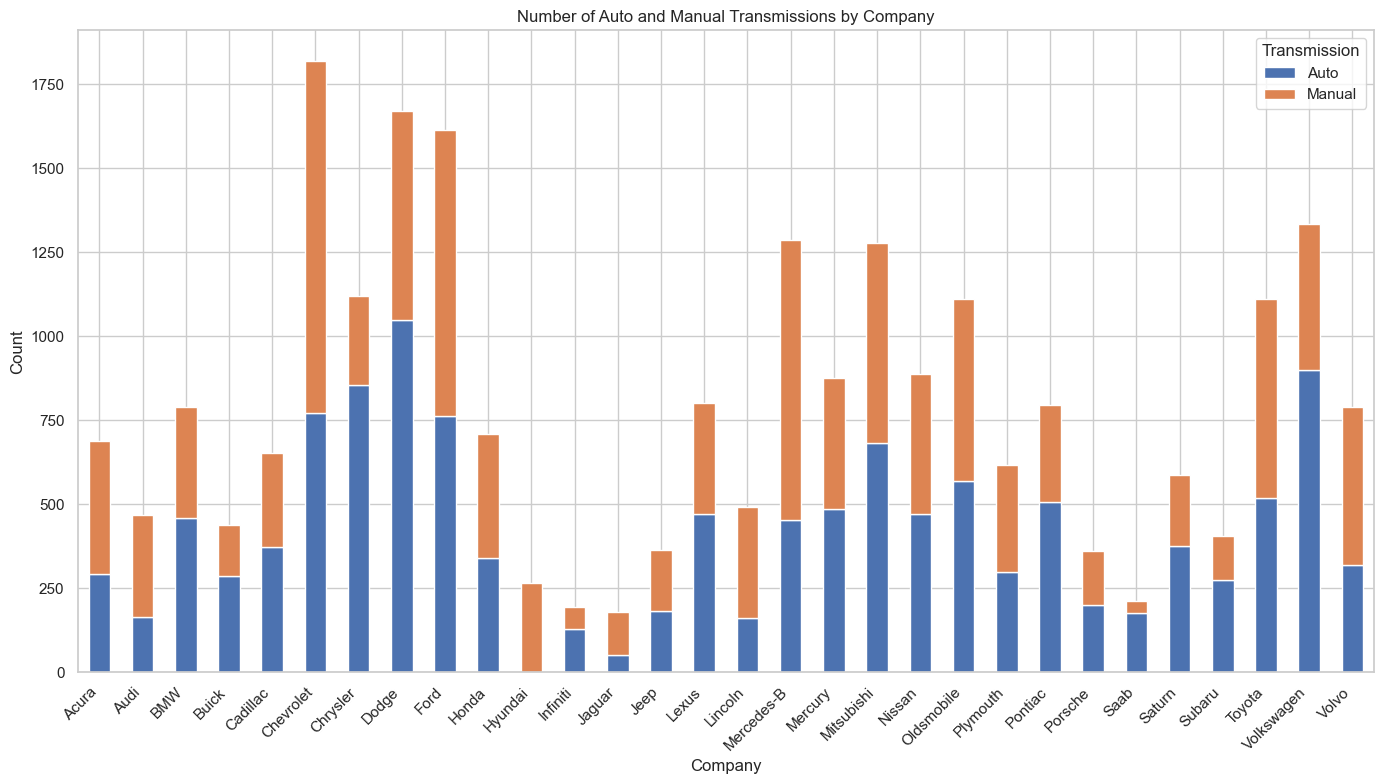

In [24]:
# Pivoting the DataFrame to make plotting easier
transmission_by_company_df = transmission_by_company.pivot(index='Company', columns='Transmission', values='count')

# Plotting the data
transmission_by_company_df.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Auto and Manual Transmissions by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()

### 4. Sales Pattern Analysis
##### Question: What patterns and trends can be identified in car sales over time?

##### Objective: To analyze the sales data over a specified time period, identifying peak sales periods, seasonal trends, and any significant fluctuations in car sales.

In [25]:
# Convert the 'Sale Date' column to datetime
car_sales_df['Sale Date'] = pd.to_datetime(car_sales_df['Date'])

# If necessary, sort the data by date
car_sales_df = car_sales_df.sort_values(by='Sale Date')

car_sales_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,price_range,Car Model,Sale Date
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Mid-range,Ford Expedition,2022-01-02
20,C_CND_000021,1/2/2022,Adrianna,Male,13500,Clay Johnson Auto Sales,Toyota,4Runner,Overhead Camshaft,Manual,Black,25000,78758-7841,Sedan,7889827,Austin,Mid-range,Toyota 4Runner,2022-01-02
21,C_CND_000022,1/2/2022,Joshua,Male,2500000,Classic Chevy,Infiniti,I30,DoubleÂ Overhead Camshaft,Auto,Black,21000,85257-3102,Hardtop,6183219,Austin,Mid-range,Infiniti I30,2022-01-02
23,C_CND_000024,1/2/2022,Arthur,Male,920000,Star Enterprises Inc,Porsche,Carrera Cabrio,DoubleÂ Overhead Camshaft,Auto,Pale White,18000,99301-3882,Passenger,7959858,Pasco,Budget,Porsche Carrera Cabrio,2022-01-02
24,C_CND_000025,1/2/2022,Lizzie,Male,672000,Suburban Ford,Volkswagen,Jetta,DoubleÂ Overhead Camshaft,Auto,Pale White,22000,53546-9427,Passenger,8570849,Janesville,Mid-range,Volkswagen Jetta,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23883,C_CND_023884,12/31/2023,Vivian,Female,650000,Tri-State Mack Inc,Honda,Odyssey,Overhead Camshaft,Manual,Pale White,27001,85257-3102,Passenger,8803676,Scottsdale,Mid-range,Honda Odyssey,2023-12-31
23884,C_CND_023885,12/31/2023,Winnie,Male,820500,U-Haul CO,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45500,78758-7841,Hatchback,8519129,Austin,High-end,Dodge Ram Pickup,2023-12-31
23885,C_CND_023886,12/31/2023,Jeremias,Male,1890000,Progressive Shippers Cooperative Association No,Ford,Ranger,Overhead Camshaft,Manual,Black,18000,53546-9427,Hardtop,6009530,Janesville,Budget,Ford Ranger,2023-12-31
23887,C_CND_023888,12/31/2023,Noah,Male,13500,Pitre Buick-Pontiac-Gmc of Scottsdale,Honda,CR-V,DoubleÂ Overhead Camshaft,Auto,Pale White,22000,99301-3882,SUV,6434862,Pasco,Mid-range,Honda CR-V,2023-12-31


In [26]:
car_sales_df['Quarter'] = car_sales_df['Sale Date'].dt.to_period('Q')
quarterly_sales = car_sales_df.groupby('Quarter')['Price ($)'].sum().reset_index()
quarterly_sales

,Quarter,Price ($)
0,2022Q1,37229344
1,2022Q2,62961164
2,2022Q3,85784580
3,2022Q4,114365257
4,2023Q1,46816692
5,2023Q2,85630415
6,2023Q3,104822268
7,2023Q4,133915745


In [27]:
year_1_Q_sales = quarterly_sales.iloc[0:4]
year_2_Q_sales = quarterly_sales.iloc[4:9]
print(year_1_Q_sales)
print(year_2_Q_sales)

  Quarter  Price ($)
0  2022Q1   37229344
1  2022Q2   62961164
2  2022Q3   85784580
3  2022Q4  114365257
  Quarter  Price ($)
4  2023Q1   46816692
5  2023Q2   85630415
6  2023Q3  104822268
7  2023Q4  133915745


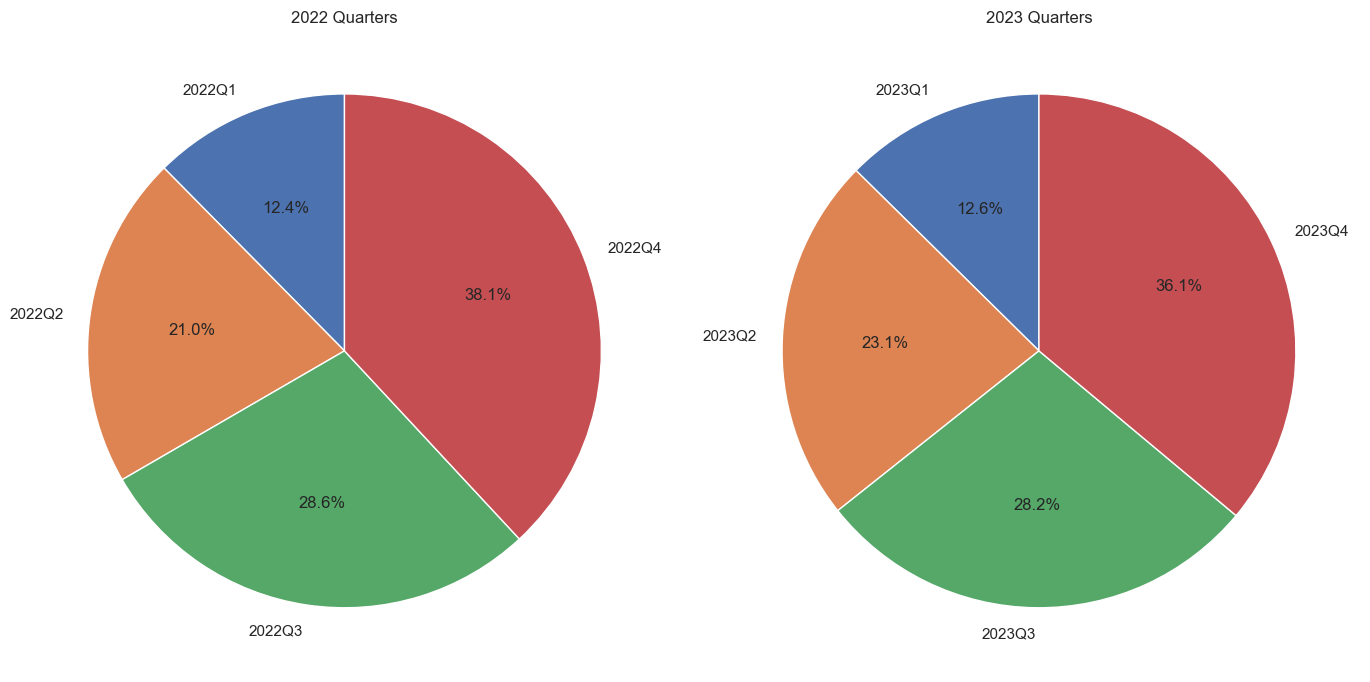

In [28]:
# Creating the subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for the first dataframe (2022)
ax1.pie(year_1_Q_sales['Price ($)'], labels=year_1_Q_sales['Quarter'], autopct='%1.1f%%', startangle=90)
ax1.set_title('2022 Quarters')

# Pie chart for the second dataframe (2023)
ax2.pie(year_2_Q_sales['Price ($)'], labels=year_2_Q_sales['Quarter'], autopct='%1.1f%%', startangle=90)
ax2.set_title('2023 Quarters')

# Display the plots
plt.tight_layout()
plt.show()

In [29]:
# Group by Quarter and Car Model, then sum the sales
quarterly_sales_by_model = car_sales_df.groupby(['Quarter', 'Model'])['Price ($)'].sum().reset_index()

# Sort the results to find the highest sales in each quarter
highest_sales_by_quarter = quarterly_sales_by_model.sort_values(['Quarter', 'Price ($)'], ascending=[True, False]).groupby('Quarter').first().reset_index()

print(highest_sales_by_quarter)

  Quarter          Model  Price ($)
0  2022Q1     Silhouette     796053
1  2022Q2  Montero Sport    1353812
2  2022Q3          Jetta    2091905
3  2022Q4          Jetta    2736618
4  2023Q1          LS400    1252307
5  2023Q2       Eldorado    1744115
6  2023Q3          LS400    2543771
7  2023Q4  Montero Sport    2623120


In [30]:
year_1_quarter_model_sales = highest_sales_by_quarter.iloc[0:4]
year_2_quarter_model_sales = highest_sales_by_quarter.iloc[4:8]
print(year_1_quarter_model_sales)
print(year_2_quarter_model_sales)

  Quarter          Model  Price ($)
0  2022Q1     Silhouette     796053
1  2022Q2  Montero Sport    1353812
2  2022Q3          Jetta    2091905
3  2022Q4          Jetta    2736618
  Quarter          Model  Price ($)
4  2023Q1          LS400    1252307
5  2023Q2       Eldorado    1744115
6  2023Q3          LS400    2543771
7  2023Q4  Montero Sport    2623120


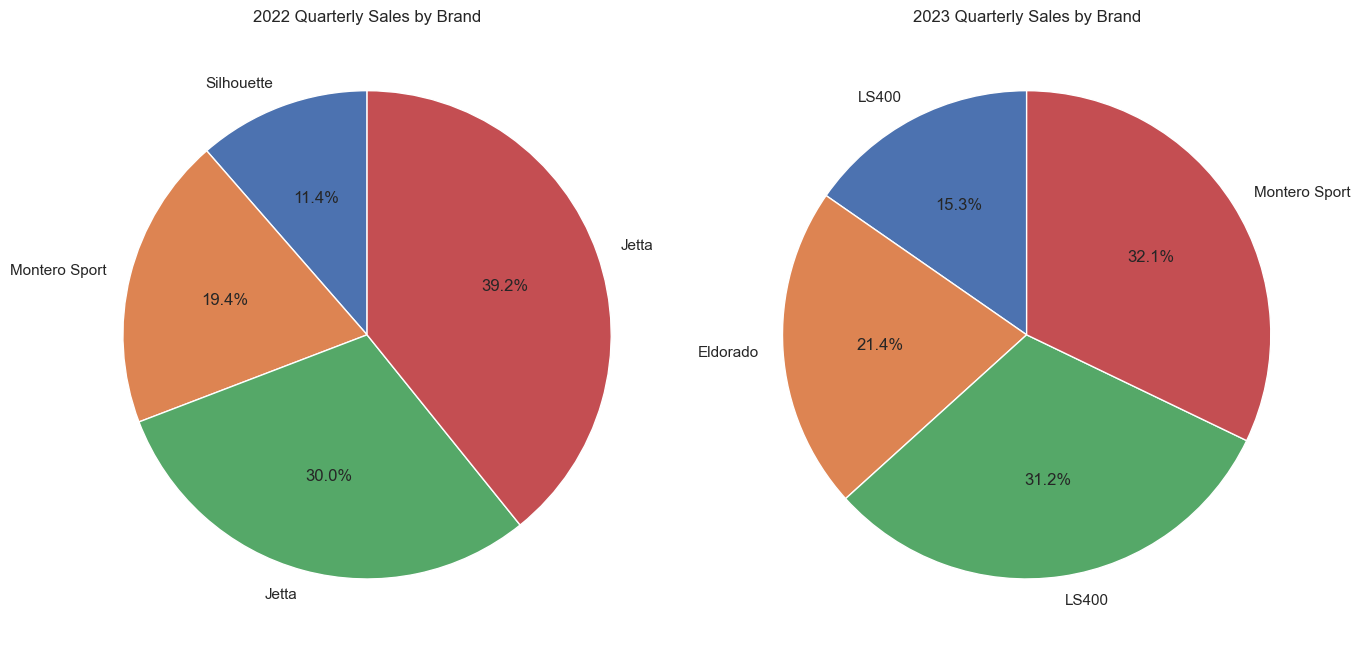

In [31]:
# Creating the subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for the first dataframe (2022)
ax1.pie(year_1_quarter_model_sales['Price ($)'], labels=year_1_quarter_model_sales['Model'], autopct='%1.1f%%', startangle=90)
ax1.set_title('2022 Quarterly Sales by Brand')

# Pie chart for the second dataframe (2023)
ax2.pie(year_2_quarter_model_sales['Price ($)'], labels=year_2_quarter_model_sales['Model'], autopct='%1.1f%%', startangle=90)
ax2.set_title('2023 Quarterly Sales by Brand')

# Display the plots
plt.tight_layout()
plt.show()